In [1]:
%pip install opencv-python matplotlib numpy pandas scipy

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread(r'data/img1.jpg')
img2 = cv2.imread(r'data/img2.jpg')

In [4]:
# img1 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
# img2 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)

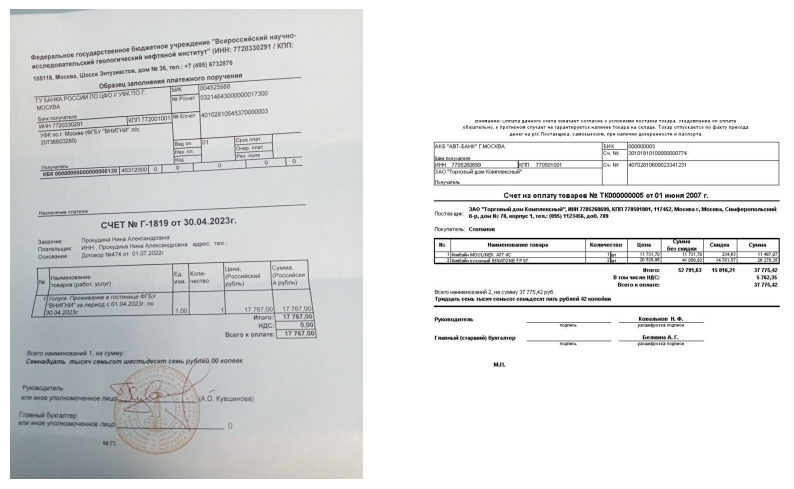

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 20))

axs[0].imshow(img1)
axs[0].axis('off')  # Hide axes

axs[1].imshow(img2)
axs[1].axis('off')  # Hide axes

plt.show()

In [6]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [7]:
def resize_img(img, width=1024):
    height = int(img.shape[0] * width / img.shape[1])
    return cv2.resize(img, (width, height))

In [8]:
img1 = resize_img(img1)
img2 = resize_img(img2)

In [9]:
img_blured = cv2.medianBlur(img1, 3)
thresh1 = cv2.adaptiveThreshold(img_blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

thresh2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [10]:
thresh = thresh1

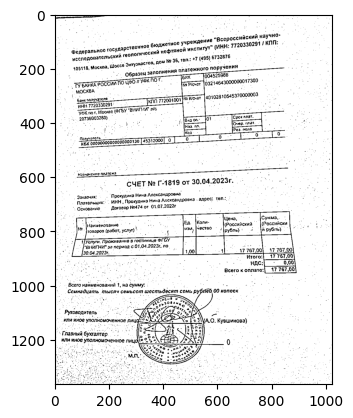

In [11]:
plt.imshow(thresh, cmap='binary')

In [12]:
import numpy as np
import pandas as pd

In [13]:
image = thresh

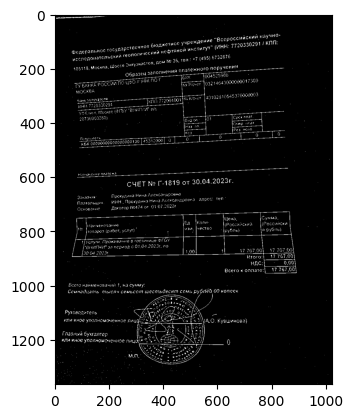

In [14]:
kernel = np.ones((2, 2), np.uint8) 
# erode the image 
erosion = cv2.erode(image, kernel, iterations=1)
plt.imshow(erosion, cmap='gray') 

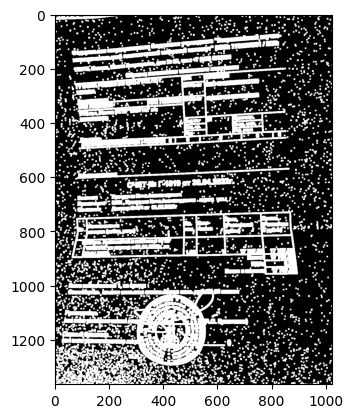

In [15]:
dilation = cv2.dilate(image, kernel, iterations=5)
plt.imshow(dilation, cmap='gray') 

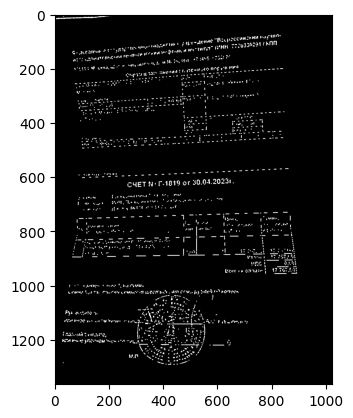

In [16]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2) 
plt.imshow(opening, cmap='gray') 

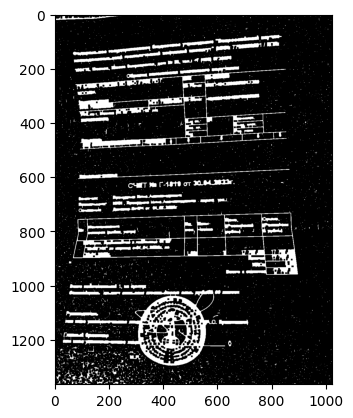

In [17]:
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=5) 
plt.imshow(closing, cmap='gray') 

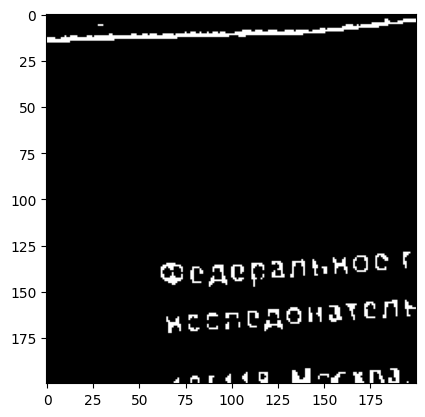

In [18]:
gaussian = cv2.GaussianBlur(image[:200, :200], (3, 3), 0.95)
gaussian = cv2.threshold(gaussian, 190, 255, cv2.THRESH_BINARY)[1]
plt.imshow(gaussian, cmap='gray')

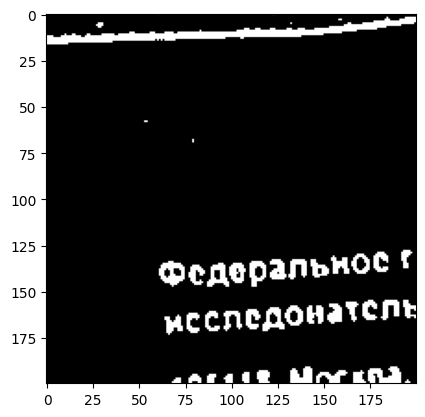

In [19]:
median = cv2.medianBlur(image[:200, :200], 3)
plt.imshow(median, cmap='gray')

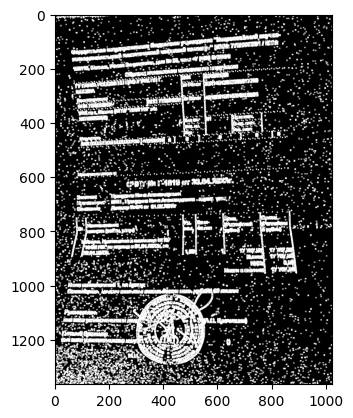

In [20]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobelx = cv2.convertScaleAbs(sobelx)
plt.imshow(sobelx, cmap='gray')

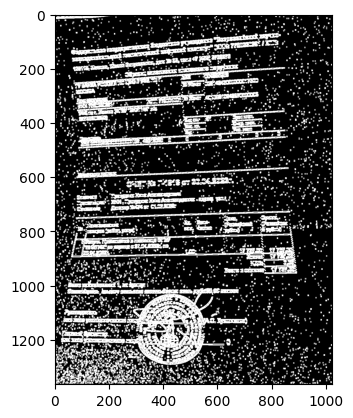

In [21]:
sobely = cv2.Sobel(image,cv2.CV_64F,0, 1, ksize=5)
sobely = cv2.convertScaleAbs(sobely)
plt.imshow(sobely, cmap='gray')

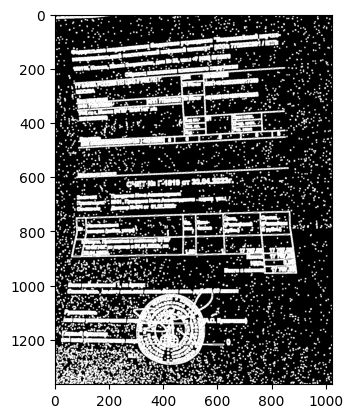

In [22]:
plt.imshow(sobelx + sobely, cmap='gray')

In [23]:
def erosion(img):
    kernel = np.ones((3, 3), np.uint8)
    img_er = img
    erosion = 0
    while np.min(img_er) != np.max(img_er):
        img_er = cv2.erode(img_er, kernel)
        erosion += 1
    return erosion

In [24]:
erosion(thresh1), erosion(thresh2)

(3, 3)

In [25]:
def dilation(img):
    return erosion(cv2.bitwise_not(img))

In [26]:
dilation(thresh1), dilation(thresh2)

(33, 176)

In [27]:
def closing(img):
    kernel = np.ones((3, 3), np.uint8)
    img_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    closing = np.sum(img != img_closed) / np.sum(img > 0)
    return closing

In [28]:
closing(thresh1), closing(thresh2)

(0.13074139713483976, 0.16047927715576507)

In [29]:
def opening(img):
    kernel = np.ones((3, 3), np.uint8)
    img_closed = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = np.sum(img != img_closed) / np.sum(img > 0)
    return closing

In [30]:
opening(thresh1), opening(thresh2)

(0.5521156402303943, 0.4870555882930662)

In [31]:
def gaussian(img):
    blurred = cv2.GaussianBlur(img, (3, 3), 0.95)
    return [np.sum(cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY)[1] != img) / np.sum(img > 0) for thresh in (120, 150, 180, 190)]

In [32]:
gaussian(thresh1), gaussian(thresh2)

([0.08134876679958647,
  0.11425564909171466,
  0.2977403633141338,
  0.6335751735341899],
 [0.08843056373993322,
  0.11468604727296536,
  0.21698422051987168,
  0.6581680089046029])

In [33]:
def median(img):
    blurred = cv2.medianBlur(img, 3, 0.95)
    return 1 - np.sum(blurred > 0) / np.sum(img > 0)

In [34]:
median(thresh1), median(thresh2)

(0.08617634027470089, 0.03516008642702806)

In [35]:
def foreground_percent(img):
    return np.sum(img > 0) / img.size

In [36]:
foreground_percent(thresh1), foreground_percent(thresh2)

(0.07750686813186813, 0.10386517452994429)

In [37]:
def gradients(img):
    foreground = np.sum(img == 255)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobely = cv2.convertScaleAbs(sobely)
    sobelxy = sobelx + sobely
    fx = np.sum(sobelx == 255) / foreground
    fy = np.sum(sobely == 255) / foreground
    fxy1 = np.sum(sobelxy == 255) / foreground
    fxy2 = np.sum(sobelxy == 255 * 2) / foreground
    return fx, fy, fxy1, fxy2


In [38]:
gradients(thresh1), gradients(thresh2)

((1.6445779796189632, 1.7477200561216955, 0.8839720868409393, 0.0),
 (0.9905061219144896, 1.3170824330517907, 0.9610030773260001, 0.0))

In [39]:
def get_cc(img):
    output = cv2.connectedComponentsWithStats(img, 4, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output
    ccs = []
    for i in range(1, numLabels):
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
        ccs.append((i, x, y, w, h, area))
    df = pd.DataFrame(ccs, columns=['label', 'x', 'y', 'w', 'h', 'area']).dropna()
    return df, labels

In [40]:
df_cc, labels = get_cc(thresh)
df_cc

,label,x,y,w,h,area
0,1,26,1,3,2,3
1,2,31,0,1,1,1
2,3,60,0,3,1,3
3,4,83,0,1,1,1
4,5,122,0,2,2,4
...,...,...,...,...,...,...
5483,5484,831,1364,1,1,1
5484,5485,877,1364,1,1,1
5485,5486,923,1364,1,1,1
5486,5487,929,1364,1,1,1


In [41]:
def filter_cc(df_cc, min_height=5, max_height=20, min_width=2, max_width=100):
    min_area = min_height * min_width
    filter1 = df_cc['h'] >= min_height
    filter2 = df_cc['h'] <= max_height
    filter3 = df_cc['w'] >= min_width
    filter4 = df_cc['w'] <= max_width
    filter5 = df_cc['area'] >= min_area
    df_char = df_cc[filter1 & filter2 & filter3 & filter4 & filter5]
    return df_char

In [42]:
df_char = filter_cc(df_cc)
df_char

,label,x,y,w,h,area
222,223,800,73,10,13,77
223,224,812,72,10,13,81
232,233,776,75,10,17,76
233,234,788,74,9,12,60
236,237,754,77,4,12,36
...,...,...,...,...,...,...
4392,4393,444,1273,8,7,32
4406,4407,413,1275,7,5,28
4408,4409,434,1275,8,6,28
4591,4592,177,1294,4,5,11


In [43]:
keep_labels = df_char['label'].to_list()

In [44]:
labels_filtered = np.copy(labels)
labels_filtered[~np.isin(labels, keep_labels)] = 0 

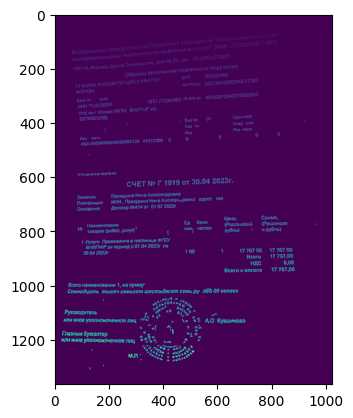

In [45]:
plt.imshow(labels_filtered)

<Axes: >

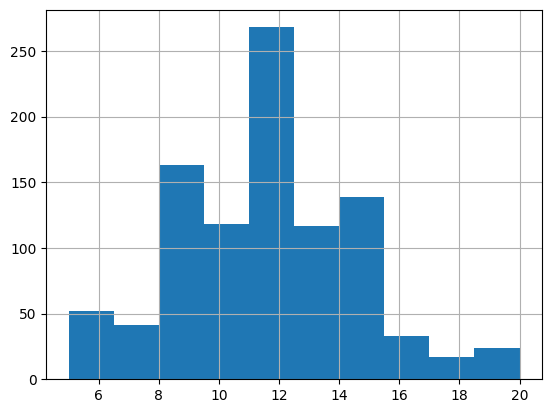

In [46]:
df_char['h'].hist(bins=10)

In [47]:
def get_font_size(df):
    return df['h'].median()
font_size = get_font_size(df_char)
font_size

11.0

In [48]:
def auc(df):
    # vals, bins, _ = plt.hist(df, bins=100)
    # area = sum(np.diff(bins) * vals)
    # print(df.value_counts())
    return len(df)

In [49]:
def auc_area(df, max_area, min_area=6):
    filter1 = df['area'] <= max_area
    filter2 = df['area'] > min_area
    return auc(df['area'][filter1 & filter2])

In [50]:
def small_speckle_factor(df, fs, min_area=5):
    filter1 = df['area'] < fs
    filter2 = df['area'] >= min_area
    filter3 = df['area'] < fs * fs 
    return len(df[filter1 & filter2]) / len(df[filter2 & filter3])

In [51]:
small_speckle_factor(df_cc, font_size)

0.2924600152322925

In [52]:
def touching_character_factor(df, fs):
    filter1 = df['h'] / df['w'] < 0.75
    filter2 = df['area'] > 3 * fs
    filter3 = df['h'] > 0.75 * fs
    filter4 = df['h'] < 2 * fs
    return len(df[filter1 & filter2 & filter3 & filter4]) / len(df[filter2 & filter3 & filter4])

In [53]:
touching_character_factor(df_cc, font_size)

0.16933333333333334

In [54]:
def get_wcc(img):
    return get_cc(cv2.bitwise_not(img))

In [55]:
df_wcc, _ = get_wcc(image)
df_wcc

,label,x,y,w,h,area
0,1,0,0,203,13,1704
1,2,205,0,5,2,6
2,3,214,0,1,1,1
3,4,216,0,1,1,1
4,5,0,0,1024,1365,1112755
...,...,...,...,...,...,...
484,485,399,1233,2,2,3
485,486,402,1234,2,1,2
486,487,508,1243,2,1,2
487,488,394,1248,2,1,2


In [56]:
def white_speckle_factor(df, min_size=3):
    filter1 = df['h'] < min_size
    filter2 = df['w'] < min_size
    return  len(df[filter1 & filter2]) / len(df)

In [57]:
white_speckle_factor(df_wcc, font_size)

0.8936605316973415

In [58]:
def small_white_speckle(df_wcc, fs, min_size=1, eps=0.001):
    filter1 = df_wcc['area'] > min_size
    filter2 = df_wcc['area'] < 0.02 * fs * fs
    filter3 = df_wcc['area'] < fs * fs
    return len(df_wcc[filter1 & filter2]) / (len(df_wcc[filter1 & filter3]) + eps)

In [59]:
small_white_speckle(df_wcc, font_size)

0.0277777134775151

In [60]:
def broken_character_factor(df, fs):
    filter1 = df['h'] < 0.75 * fs
    filter2 = df['w'] < 0.75 * fs
    return len(df[filter1 & filter2].groupby(['h', 'w'])) / (fs * fs)

In [61]:
broken_character_factor(df_cc, font_size)

0.4380165289256198

In [62]:
from itertools import groupby
from scipy import stats

def stroke_thickness_factor(img):
    thicknesses = []
    for j in range(img.shape[1]):
        thicknesses.extend(list(sum(1 for _ in a) for i, a in groupby(image[:, j]) if i == 255))
    return stats.mode(thicknesses)[0]
stroke_thickness_factor(thresh1)

2

In [63]:
def stroke_width(df):
    sum_wh = df['w'] + df['h']
    sw = 0.5 * sum_wh + np.sqrt(0.125 * sum_wh * sum_wh - df['area'] / 2)
    return np.mean(sw), np.std(sw)
stroke_width(df_char)

(16.527417694781562, 6.872447648115525)

In [64]:
from scipy.stats import entropy

def image_entropy(img):
    entropies = []
    for bins in (2 ** i for i in range(1, 8)):
        hist, _ = np.histogram(img.ravel(), bins=bins, range=(0, bins))
        prob_dist = hist / hist.sum()
        entropies.append(entropy(prob_dist, base=2))
    return entropies

In [65]:
image_entropy(img2)

[0.820033234032767,
 1.8910323979946053,
 2.76685161533317,
 3.5559863485718664,
 4.262894888666058,
 5.250202980809901,
 6.394076918829601]

In [66]:
def mean_sd(img):
    return list(map(lambda x: float(x[0][0]), cv2.meanStdDev(img)))

In [67]:
mean_sd(img1)

[196.80811870421246, 34.83798954983827]

In [68]:
def get_grounds_mean(orig_img, thresh):
    return np.mean(orig_img[thresh > 0]), np.mean(orig_img[thresh == 0])


In [69]:
get_grounds_mean(img1, thresh1)

(112.51041205139566, 203.89072019754556)

In [70]:
def get_uniformities(img, thresh):
    foreground_means, background_means = [], []
    for i in (0, 2, 4):
        parts = 2 ** i
        part_size = img.shape[0] // parts 
        for j in range(0, part_size * parts, part_size):
            foreground_mean, background_mean = get_grounds_mean(img[j: j + part_size], thresh[j: j + part_size])
            single_peak_threshold = (background_mean - foreground_mean) / foreground_mean / (255 - background_mean)
            if single_peak_threshold >= 0.01:
                foreground_means.append(foreground_mean)
                background_means.append(background_mean)
    return np.std(foreground_means), np.std(background_means)


In [71]:
get_uniformities(img1, thresh1)

(7.102338865784442, 8.735854268232636)

In [72]:
def continuity(df):
    mean_h, mean_w = np.mean(df['h']), np.mean(df['w'])
    

In [73]:
def stability_of_cc_values(img, labels):
    max_cc_vals, min_cc_vals = [], []
    for i in range(np.max(labels)):
        cc = img[labels == i]
        if np.any(cc):
            max_cc_vals.append(np.max(cc))
            min_cc_vals.append(np.min(cc))
    return np.std(max_cc_vals), np.std(min_cc_vals)

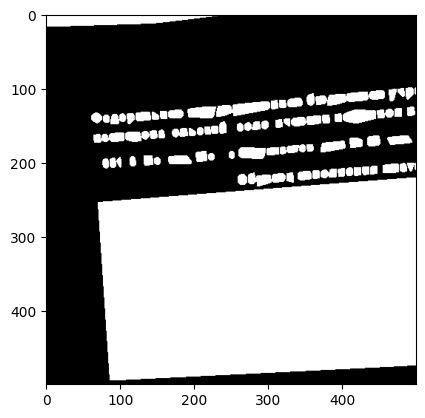

In [74]:
mser = cv2.MSER_create()
gray_img = img1.copy()
regions, _ = mser.detectRegions(img1)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(gray_img, hulls, 1, (0, 0, 255), 2)


mask = np.zeros((img1.shape[0], img1.shape[1], 1), dtype=np.uint8)
ws, hs = [], []
for contour in hulls:
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

plt.imshow(mask[:500, :500], cmap='gray')

In [520]:
def find_page(thresh: np.array):
    """
    Try to find big rectangular object on an image
    """
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, thresh.shape[0] // 4, True)
        if len(approx) == 4:
            return approx, cv2.boundingRect(cnt)
    return 0, 0, *thresh.shape


In [521]:
def resize(img: np.array, width: int) -> np.array:
    height = int(img.shape[0] * width / img.shape[1])
    return cv2.resize(img, (width, height))


def order_points(pts: np.array) -> np.array:
    """
    Arrange points to start from top left
    """
    pts = pts[:, 0]
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect



In [522]:
def align_page(best_approx: np.array, img: np.array) -> np.array:
    """
    Align and crop found page
    """
    best_approx = order_points(best_approx)
    pts1 = np.float32(best_approx)
    pts2 = np.float32([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]], [0, img.shape[0]]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    img = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return img

In [523]:
def preprocess_image(img: np.array, width: int = 1024, min_page_size=100, rotate=False) -> np.array:
    """
    Prepare image for processing
    """
    if rotate:
        img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = resize(img, width)
    img_blured = cv2.GaussianBlur(img, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(
        img_blured,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11,
        2,
    )
    
    kernel = np.ones((3, 3), np.uint8)
    morph = thresh
    # morph = cv2.medianBlur(morph, 7, 0)
    # morph = cv2.erode(morph, kernel, iterations=2)
    # morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel, iterations=3)
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=3)
    # try to find a page on the image
    best_approx, max_rectangle = find_page(morph)
    # align and crop the page
    if (max_rectangle[2] > min_page_size) and (max_rectangle[3] > min_page_size):
        img = align_page(best_approx, img)
    img = resize(img, width)
    return img

In [524]:
img1 = cv2.imread('data/1.jpg')
img2 = cv2.imread('data/2.jpg')
img3 = cv2.imread('data/M_Img_WP_D1_L2_r35_a0_b0.jpg')
img4 = cv2.imread('data/M_Img_Android_D10_L2_r35_a0_b0_Ob2.jpg.jpg')

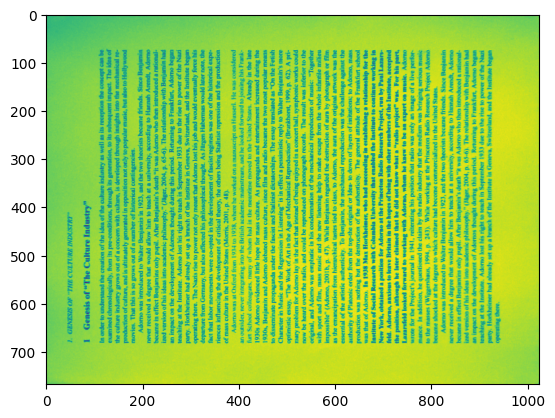

In [528]:
img_prep = preprocess_image(img3)
plt.imshow(img_prep)

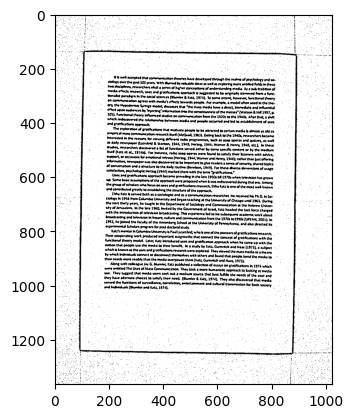

In [510]:
img = resize(img4, 1024)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur image
blur = cv2.GaussianBlur(gray, (3, 3), 0)

thresh = cv2.adaptiveThreshold(
        blur,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11,
        2,
    )
plt.imshow(thresh, cmap='gray')

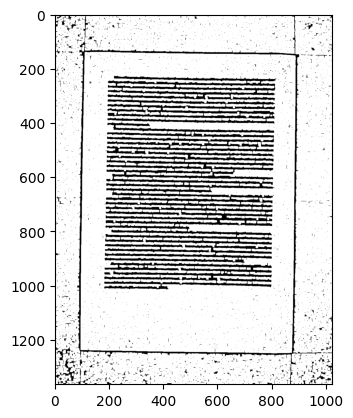

In [516]:
# apply morphology
kernel = np.ones((3, 3), np.uint8)
morph = thresh
# morph = cv2.medianBlur(morph, 7, 0)
# morph = cv2.erode(morph, kernel, iterations=2)
# morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel, iterations=1)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=3)
plt.imshow(morph, cmap='gray')

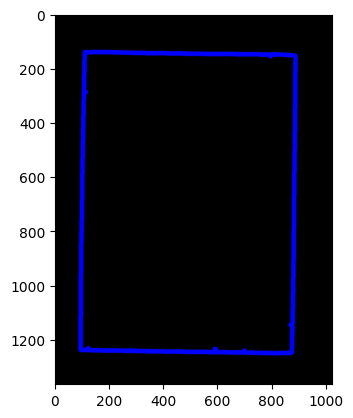

In [519]:
page = np.zeros_like(img)
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_rectangle = (0, 0, 0, 0)
best_approx = None
contours = sorted(contours, key=cv2.contourArea, reverse=True)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, thresh.shape[0] // 4, True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.drawContours(page, [cnt], -1, (0, 0, 255), 15)
        break
# draw white filled largest contour on black just as a check to see it got the correct region
# cv2.drawContours(page, contours, -1, (255,255,255), -1)
# best_approx = order_points(best_approx)
# img_cnt = cv2.drawContours(img, [best_approx], -1, (0, 0, 255), 15)
plt.imshow(page, cmap='gray')

In [513]:
best_approx

array([[[   0,    0]],

       [[   0, 1364]],

       [[1023, 1364]],

       [[1023,    0]]], dtype=int32)